<a href="https://colab.research.google.com/github/BeforeTheStorm202/DACN/blob/main/RF_GAN_results_bin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import seaborn as sns
import pandas as pd
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
def evaluation(y_test, y_pred):
  print('Misclassified samples: %d' % (y_test != y_pred).sum())
  result = confusion_matrix(y_test, y_pred, normalize='true')
  print("Confusion Matrix:")
  print(result)
  sns.heatmap(result, annot=True)
  result1 = classification_report(y_test, y_pred)
  print("Classification Report:",)
  print (result1)
  result2 = 100* accuracy_score(y_test, y_pred)
  print("Accuracy:", result2)
  result3 = precision_score(y_test, y_pred)
  print("Precision:",result3)
  result4 = recall_score(y_test, y_pred)
  print("Recall:",result4)
  result5 = f1_score(y_test, y_pred)
  print("F1:",result5)
  #result6 = roc_auc_score(y_test, y_pred, multi_class='ovo')
  #print("AUC:",result6)

# Load trainset & testset

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/DACN_XAI_Adv_defense/Dataset/insdn/binary/train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275111 entries, 0 to 275110
Data columns (total 77 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow Duration      275111 non-null  float64
 1   Tot Fwd Pkts       275111 non-null  float64
 2   Tot Bwd Pkts       275111 non-null  float64
 3   TotLen Fwd Pkts    275111 non-null  float64
 4   TotLen Bwd Pkts    275111 non-null  float64
 5   Fwd Pkt Len Max    275111 non-null  float64
 6   Fwd Pkt Len Min    275111 non-null  float64
 7   Fwd Pkt Len Mean   275111 non-null  float64
 8   Fwd Pkt Len Std    275111 non-null  float64
 9   Bwd Pkt Len Max    275111 non-null  float64
 10  Bwd Pkt Len Min    275111 non-null  float64
 11  Bwd Pkt Len Mean   275111 non-null  float64
 12  Bwd Pkt Len Std    275111 non-null  float64
 13  Flow Byts/s        275111 non-null  float64
 14  Flow Pkts/s        275111 non-null  float64
 15  Flow IAT Mean      275111 non-null  float64
 16  Fl

In [4]:
test_df = pd.read_csv('/content/drive/MyDrive/DACN_XAI_Adv_defense/Dataset/insdn/binary/test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow Duration      68778 non-null  float64
 1   Tot Fwd Pkts       68778 non-null  float64
 2   Tot Bwd Pkts       68778 non-null  float64
 3   TotLen Fwd Pkts    68778 non-null  float64
 4   TotLen Bwd Pkts    68778 non-null  float64
 5   Fwd Pkt Len Max    68778 non-null  float64
 6   Fwd Pkt Len Min    68778 non-null  float64
 7   Fwd Pkt Len Mean   68778 non-null  float64
 8   Fwd Pkt Len Std    68778 non-null  float64
 9   Bwd Pkt Len Max    68778 non-null  float64
 10  Bwd Pkt Len Min    68778 non-null  float64
 11  Bwd Pkt Len Mean   68778 non-null  float64
 12  Bwd Pkt Len Std    68778 non-null  float64
 13  Flow Byts/s        68778 non-null  float64
 14  Flow Pkts/s        68778 non-null  float64
 15  Flow IAT Mean      68778 non-null  float64
 16  Flow IAT Std       687

In [5]:
train_label = train_df['Label']
train_label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 275111 entries, 0 to 275110
Series name: Label
Non-Null Count   Dtype
--------------   -----
275111 non-null  int64
dtypes: int64(1)
memory usage: 2.1 MB


In [6]:
test_label = test_df['Label']
test_label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 68778 entries, 0 to 68777
Series name: Label
Non-Null Count  Dtype
--------------  -----
68778 non-null  int64
dtypes: int64(1)
memory usage: 537.5 KB


In [7]:
train_df = train_df.drop(columns = ['Label'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275111 entries, 0 to 275110
Data columns (total 76 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow Duration      275111 non-null  float64
 1   Tot Fwd Pkts       275111 non-null  float64
 2   Tot Bwd Pkts       275111 non-null  float64
 3   TotLen Fwd Pkts    275111 non-null  float64
 4   TotLen Bwd Pkts    275111 non-null  float64
 5   Fwd Pkt Len Max    275111 non-null  float64
 6   Fwd Pkt Len Min    275111 non-null  float64
 7   Fwd Pkt Len Mean   275111 non-null  float64
 8   Fwd Pkt Len Std    275111 non-null  float64
 9   Bwd Pkt Len Max    275111 non-null  float64
 10  Bwd Pkt Len Min    275111 non-null  float64
 11  Bwd Pkt Len Mean   275111 non-null  float64
 12  Bwd Pkt Len Std    275111 non-null  float64
 13  Flow Byts/s        275111 non-null  float64
 14  Flow Pkts/s        275111 non-null  float64
 15  Flow IAT Mean      275111 non-null  float64
 16  Fl

In [8]:
test_df = test_df.drop(columns = ['Label'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow Duration      68778 non-null  float64
 1   Tot Fwd Pkts       68778 non-null  float64
 2   Tot Bwd Pkts       68778 non-null  float64
 3   TotLen Fwd Pkts    68778 non-null  float64
 4   TotLen Bwd Pkts    68778 non-null  float64
 5   Fwd Pkt Len Max    68778 non-null  float64
 6   Fwd Pkt Len Min    68778 non-null  float64
 7   Fwd Pkt Len Mean   68778 non-null  float64
 8   Fwd Pkt Len Std    68778 non-null  float64
 9   Bwd Pkt Len Max    68778 non-null  float64
 10  Bwd Pkt Len Min    68778 non-null  float64
 11  Bwd Pkt Len Mean   68778 non-null  float64
 12  Bwd Pkt Len Std    68778 non-null  float64
 13  Flow Byts/s        68778 non-null  float64
 14  Flow Pkts/s        68778 non-null  float64
 15  Flow IAT Mean      68778 non-null  float64
 16  Flow IAT Std       687

# Train RF_bin

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)

In [10]:
model.fit(train_df, train_label)

RandomForestClassifier(random_state=42)

# Evaluate on testset

In [11]:
y_pred = model.predict(test_df)

Misclassified samples: 3
Confusion Matrix:
[[9.99926616e-01 7.33837235e-05]
 [3.62640750e-05 9.99963736e-01]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13627
           1       1.00      1.00      1.00     55151

    accuracy                           1.00     68778
   macro avg       1.00      1.00      1.00     68778
weighted avg       1.00      1.00      1.00     68778

Accuracy: 99.99563814010294
Precision: 0.9999818676337262
Recall: 0.9999637359250059
F1: 0.999972801697174


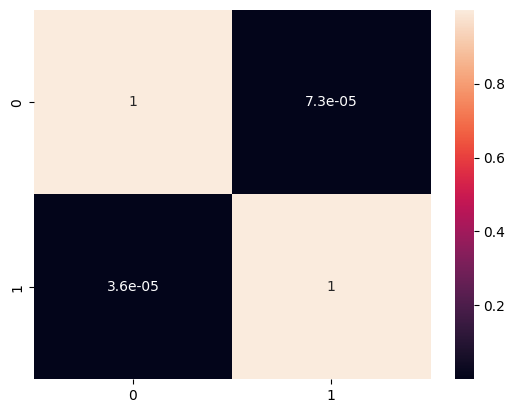

In [12]:
evaluation(test_label, y_pred)

In [13]:
import joblib
# save
joblib.dump(model, "/content/drive/MyDrive/DACN_XAI_Adv_defense/InSDN/random_forest_smote_bin.joblib")

['/content/drive/MyDrive/DACN_XAI_Adv_defense/InSDN/random_forest_smote_bin.joblib']

# Load model & adv sample dataset(s)

In [ ]:
import joblib
# load
model = joblib.load("/content/drive/MyDrive/DACN_XAI_Adv_defense/InSDN/random_forest_smote_bin.joblib")

In [14]:
feature_list = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg',
       'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts',
       'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max',
       'Idle Min']

## HSJ

In [15]:
hsj_df = pd.read_csv('/content/drive/MyDrive/DACN_XAI_Adv_defense/Dataset/insdn/adv/24_feature/hsj/hsj_bin_feature')

In [16]:
#hsj_df.columns = feature_list
hsj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55151 entries, 0 to 55150
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow Duration      55151 non-null  float64
 1   Tot Fwd Pkts       55151 non-null  float64
 2   Tot Bwd Pkts       55151 non-null  float64
 3   TotLen Fwd Pkts    55151 non-null  float64
 4   TotLen Bwd Pkts    55151 non-null  float64
 5   Fwd Pkt Len Max    55151 non-null  float64
 6   Fwd Pkt Len Min    55151 non-null  float64
 7   Fwd Pkt Len Mean   55151 non-null  float64
 8   Fwd Pkt Len Std    55151 non-null  float64
 9   Bwd Pkt Len Max    55151 non-null  float64
 10  Bwd Pkt Len Min    55151 non-null  float64
 11  Bwd Pkt Len Mean   55151 non-null  float64
 12  Bwd Pkt Len Std    55151 non-null  float64
 13  Flow Byts/s        55151 non-null  float64
 14  Flow Pkts/s        55151 non-null  float64
 15  Flow IAT Mean      55151 non-null  float64
 16  Flow IAT Std       551

In [29]:
hsj_label = test_label.drop(test_label[test_label == 0].index).reset_index(drop=True)
hsj_label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 55151 entries, 0 to 55150
Series name: Label
Non-Null Count  Dtype
--------------  -----
55151 non-null  int64
dtypes: int64(1)
memory usage: 431.0 KB


In [22]:
y_pred = model.predict(hsj_df)

Misclassified samples: 2
Confusion Matrix:
[[0.00000000e+00 0.00000000e+00]
 [3.62640750e-05 9.99963736e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00     55151

    accuracy                           1.00     55151
   macro avg       0.50      0.50      0.50     55151
weighted avg       1.00      1.00      1.00     55151

Accuracy: 99.99637359250059
Precision: 1.0
Recall: 0.9999637359250059
F1: 0.9999818676337261


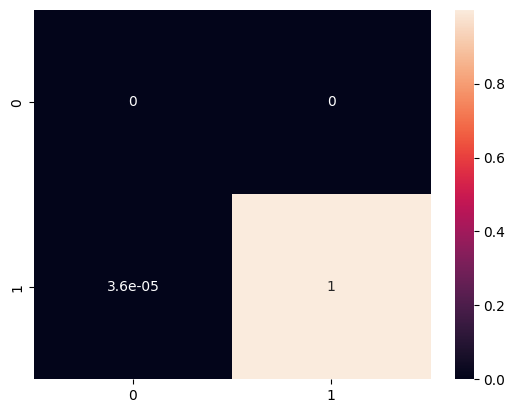

In [32]:
evaluation(hsj_label, y_pred)

## PGD

In [33]:
pgd_df = pd.read_csv('/content/drive/MyDrive/DACN_XAI_Adv_defense/Dataset/insdn/adv/24_feature/pgd/pgd_mlp_bin_feature')
pgd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55151 entries, 0 to 55150
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow Duration      55151 non-null  float64
 1   Tot Fwd Pkts       55151 non-null  float64
 2   Tot Bwd Pkts       55151 non-null  float64
 3   TotLen Fwd Pkts    55151 non-null  float64
 4   TotLen Bwd Pkts    55151 non-null  float64
 5   Fwd Pkt Len Max    55151 non-null  float64
 6   Fwd Pkt Len Min    55151 non-null  float64
 7   Fwd Pkt Len Mean   55151 non-null  float64
 8   Fwd Pkt Len Std    55151 non-null  float64
 9   Bwd Pkt Len Max    55151 non-null  float64
 10  Bwd Pkt Len Min    55151 non-null  float64
 11  Bwd Pkt Len Mean   55151 non-null  float64
 12  Bwd Pkt Len Std    55151 non-null  float64
 13  Flow Byts/s        55151 non-null  float64
 14  Flow Pkts/s        55151 non-null  float64
 15  Flow IAT Mean      55151 non-null  float64
 16  Flow IAT Std       551

In [34]:
#pgd_df.columns = feature_list
pgd_label = hsj_label
pgd_label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 55151 entries, 0 to 55150
Series name: Label
Non-Null Count  Dtype
--------------  -----
55151 non-null  int64
dtypes: int64(1)
memory usage: 431.0 KB


In [35]:
y_pred2 = model.predict(pgd_df)

Misclassified samples: 5
Confusion Matrix:
[[0.00000000e+00 0.00000000e+00]
 [9.06601875e-05 9.99909340e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00     55151

    accuracy                           1.00     55151
   macro avg       0.50      0.50      0.50     55151
weighted avg       1.00      1.00      1.00     55151

Accuracy: 99.99093398125147
Precision: 1.0
Recall: 0.9999093398125147
F1: 0.9999546678513468


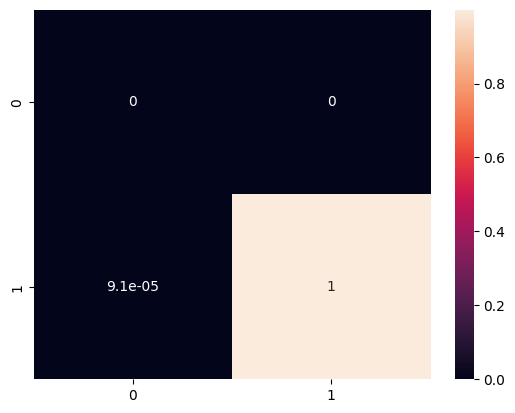

In [36]:
evaluation(pgd_label, y_pred2)

## FGSM

In [37]:
fgsm_df = pd.read_csv('/content/drive/MyDrive/DACN_XAI_Adv_defense/Dataset/insdn/adv/24_feature/fgm/fgm_mlp_bin_feature.csv')
#fgsm_df.columns = feature_list
fgsm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55151 entries, 0 to 55150
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow Duration      55151 non-null  float64
 1   Tot Fwd Pkts       55151 non-null  float64
 2   Tot Bwd Pkts       55151 non-null  float64
 3   TotLen Fwd Pkts    55151 non-null  float64
 4   TotLen Bwd Pkts    55151 non-null  float64
 5   Fwd Pkt Len Max    55151 non-null  float64
 6   Fwd Pkt Len Min    55151 non-null  float64
 7   Fwd Pkt Len Mean   55151 non-null  float64
 8   Fwd Pkt Len Std    55151 non-null  float64
 9   Bwd Pkt Len Max    55151 non-null  float64
 10  Bwd Pkt Len Min    55151 non-null  float64
 11  Bwd Pkt Len Mean   55151 non-null  float64
 12  Bwd Pkt Len Std    55151 non-null  float64
 13  Flow Byts/s        55151 non-null  float64
 14  Flow Pkts/s        55151 non-null  float64
 15  Flow IAT Mean      55151 non-null  float64
 16  Flow IAT Std       551

In [38]:
fgsm_label = hsj_label
fgsm_label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 55151 entries, 0 to 55150
Series name: Label
Non-Null Count  Dtype
--------------  -----
55151 non-null  int64
dtypes: int64(1)
memory usage: 431.0 KB


In [39]:
y_pred3 = model.predict(fgsm_df)

Misclassified samples: 3
Confusion Matrix:
[[0.00000000e+00 0.00000000e+00]
 [5.43961125e-05 9.99945604e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00     55151

    accuracy                           1.00     55151
   macro avg       0.50      0.50      0.50     55151
weighted avg       1.00      1.00      1.00     55151

Accuracy: 99.99456038875088
Precision: 1.0
Recall: 0.9999456038875089
F1: 0.9999728012040001


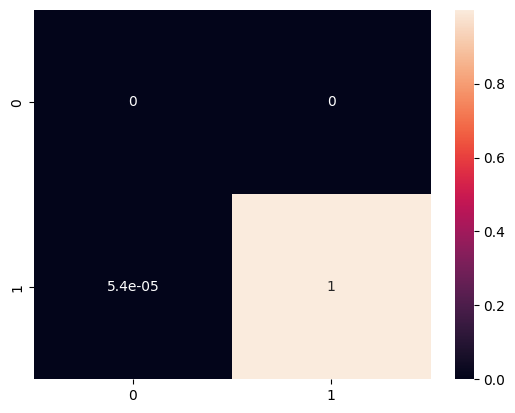

In [40]:
evaluation(fgsm_label, y_pred3)